In [6]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('olist_order_reviews_dataset.csv')
data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [8]:
data.drop(['review_id', 'order_id', 'review_creation_date', 'review_answer_timestamp', 'review_comment_title'], axis = 1, inplace=True)

In [9]:
data

,review_score,review_comment_message
0,4,NaN
1,5,NaN
2,5,NaN
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
...,...,...
99219,5,NaN
99220,5,NaN
99221,5,"Excelente mochila, entrega super rápida. Super..."
99222,4,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_score            99224 non-null  int64 
 1   review_comment_message  40977 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [11]:
data.isnull().sum(axis=0)

review_score                  0
review_comment_message    58247
dtype: int64

In [12]:
data.dropna(axis=0, inplace=True)

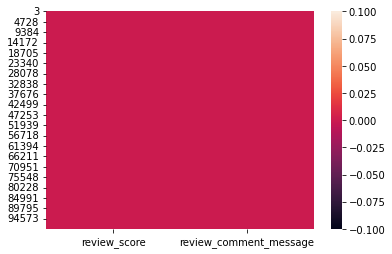

In [13]:
sns.heatmap(data.isnull());

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40977 entries, 3 to 99223
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_score            40977 non-null  int64 
 1   review_comment_message  40977 non-null  object
dtypes: int64(1), object(1)
memory usage: 960.4+ KB


In [15]:
data

,review_score,review_comment_message
3,5,Recebi bem antes do prazo estipulado.
4,5,Parabéns lojas lannister adorei comprar pela I...
9,4,aparelho eficiente. no site a marca do aparelh...
12,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,5,"Vendedor confiável, produto ok e entrega antes..."
...,...,...
99205,4,para este produto recebi de acordo com a compr...
99208,5,Entregou dentro do prazo. O produto chegou em ...
99215,3,"O produto não foi enviado com NF, não existe v..."
99221,5,"Excelente mochila, entrega super rápida. Super..."


In [16]:
data.describe()

,review_score
count,40977.000000
mean,3.669864
std,1.615418
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
g1 = [go.Box(y=data.review_score,name="review_score",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
layout1 = go.Layout(title="Evaluation Notes",yaxis=dict(range=[0,13])) 
fig1 = go.Figure(data=g1,layout=layout1)
iplot(fig1)

In [18]:
fig2 = px.histogram(data,x='review_score',color='review_score',template='plotly_dark')
fig2.show()

In [19]:
data['review_score'] = data['review_score'].apply(lambda x: 1 if x >= 2 else 0) 

In [20]:
posite = data[data['review_score'] == 1 ]
negative = data[data['review_score'] == 0]

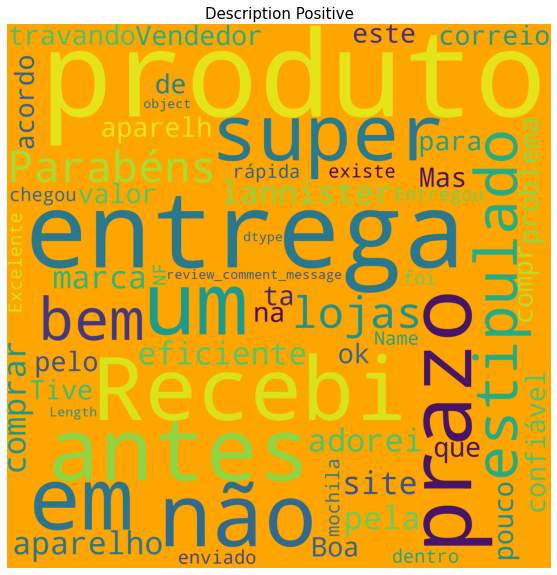

In [21]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(posite['review_comment_message']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

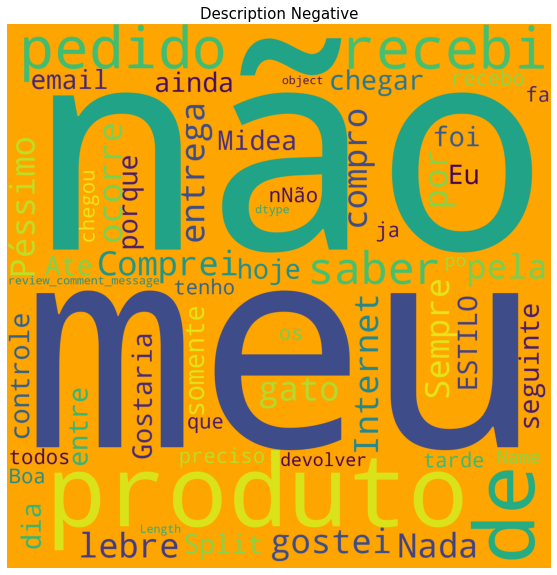

In [22]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['review_comment_message']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [23]:
data.head()

,review_score,review_comment_message
3,1,Recebi bem antes do prazo estipulado.
4,1,Parabéns lojas lannister adorei comprar pela I...
9,1,aparelho eficiente. no site a marca do aparelh...
12,1,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,1,"Vendedor confiável, produto ok e entrega antes..."


In [24]:
X = data.iloc[:, 1].values
X

array(['Recebi bem antes do prazo estipulado.',
       'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa',
       'aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho',
       ...,
       'O produto não foi enviado com NF, não existe venda sem NF, com certeza fico no aguardo do envio da NF podendo ser por e-mail.',
       'Excelente mochila, entrega super rápida. Super recomendo essa loja!',
       'meu produto chegou e ja tenho que devolver, pois está com defeito , não segurar carga'],
      dtype=object)

In [25]:
X.shape

(40977,)

In [26]:
type(X)

numpy.ndarray

In [27]:
y = data.iloc[:, 0].values
y

array([1, 1, 1, ..., 1, 1, 0])

In [28]:
X, _, y, _ = train_test_split(X, y, stratify = y)

In [29]:
print(X.shape, y.shape )

(30732,) (30732,)


In [30]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1]), array([ 6559, 24173]))

In [44]:
def clean_t(t):
  t = BeautifulSoup(t, 'lxml').get_text()
  t = re.sub(r"@[A-Za-z0-9]+", ' ', t)
  t = re.sub(r"https?://[A-Za-z0-9./]+", ' ', t)
  t = re.sub(r"[^a-zA-Z.!?]", ' ', t)
  t = re.sub(r" +", ' ', t)
  return t

In [45]:
import spacy

In [46]:
nlp = spacy.blank("pt")

In [47]:
nlp

In [48]:
stop_words = sp.lang.pt.STOP_WORDS

In [49]:
print(stop_words)

{'eventual', 'pode', 'seu', 'vinte', 'ambos', 'conhecida', 'suas', 'fim', 'quais', 'comprido', 'quinze', 'vossas', 'usa', 'estar', 'primeira', 'fazia', 'ir', 'só', 'após', 'segunda', 'lugar', 'conselho', 'dizer', 'diante', 'local', 'terceira', 'teu', 'dessa', 'toda', 'ao', 'foste', 'ainda', 'nunca', 'final', 'são', 'tenho', 'vem', 'puderam', 'somos', 'bom', 'se', 'sétimo', 'aqui', 'deverá', 'vêm', 'pouco', 'baixo', 'nossos', 'podia', 'os', 'tivestes', 'deste', 'cima', 'está', 'pela', 'no', 'tanto', 'sua', 'vós', 'bem', 'posso', 'último', 'cujo', 'cedo', 'além', 'vários', 'desse', 'forma', 'sexto', 'nesse', 'qualquer', 'direita', 'me', 'muito', 'é', 'sete', 'próxima', 'debaixo', 'contra', 'inicio', 'foram', 'meus', 'sempre', 'vais', 'ela', 'seis', 'estivemos', 'esse', 'favor', 'faz', 'à', 'nossa', 'quê', 'nessa', 'acerca', 'fui', 'posição', 'uma', 'máximo', 'temos', 'eu', 'falta', 'ver', 'como', 'sob', 'pelos', 'onde', 'nova', 'maioria', 'esses', 'grandes', 'cada', 'estas', 'aos', 'tard

In [50]:
len(stop_words)

413

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
def clean_t2(t):
  t = t.lower()
  document = nlp(t)

  words = []
  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  words = ' '.join([str(element) for element in words])

  return words

In [54]:
text2 = clean_t2(t)
text2

NameError: ignored

In [ ]:
data_clean = [clean_t2(clean_t(t)) for t in X]

In [ ]:
for _ in range(10):
  print(data_clean[random.randint(0, len(data_clean) - 1)])

In [ ]:
data_labels = y

In [ ]:
data_labels[data_labels == 4] = 1

In [ ]:
data_labels

In [ ]:
np.unique(data_labels)

# Tokenization

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [ ]:
tokenizer.vocab_size

In [ ]:
print(tokenizer.subwords)

In [ ]:
ids = tokenizer.encode('eu gostei')
ids

In [ ]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

# Padding

In [ ]:
max_len = max([len(sentence) for sentence in data_inputs])
max_len

In [ ]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs,
                                                            value = 0,
                                                            padding = 'post',
                                                            maxlen=max_len)

In [ ]:
for _ in range(10):
  print(data_inputs[random.randint(0, len(data_inputs) - 1)])

# Division of database into training and testing

In [ ]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs,
                                                                        data_labels,
                                                                        test_size=0.3,
                                                                        stratify = data_labels)

In [ ]:
train_inputs[0]

In [ ]:
train_inputs.shape

In [ ]:
train_labels.shape

In [ ]:
test_inputs.shape

In [ ]:
test_labels.shape

# Model building

In [ ]:
class DCNN(tf.keras.Model):

  def __init__(self,
               vocab_size,
               emb_dim=128,
               nb_filters=50,
               ffn_units=512,
               nb_classes=2,
               dropout_rate=0.1,
               training=True,
               name="dcnn"):
    super(DCNN, self).__init__(name=name)
    self.embedding = layers.Embedding(vocab_size, emb_dim)
    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')
    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')
    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')
    self.pool = layers.GlobalMaxPool1D()
    
#estrutura da rede neural
    self.dense_1 = layers.Dense(units = ffn_units, activation = 'relu')
    self.dropout = layers.Dropout(rate = dropout_rate)
    if nb_classes == 2:
      self.last_dense = layers.Dense(units = 1, activation = 'sigmoid')
    else:
      self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax')

  def call(self, inputs, training):
    x = self.embedding(inputs)
    x_1 = self.bigram(x)
    x_1 = self.pool(x_1)
    x_2 = self.trigram(x)
    x_2 = self.pool(x_2)
    x_3 = self.fourgram(x)
    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1)
    merged = self.dense_1(merged)
    merged = self.dropout(merged, training)
    output = self.last_dense(merged)

    return output

# Training

In [ ]:
vocab_size = tokenizer.vocab_size
vocab_size

In [ ]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
batch_size = 64
nb_classes = len(set(train_labels))
nb_classes

In [ ]:
dropout_rate = 0.2
nb_epochs = 5  

In [ ]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters,
            ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [ ]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = Dcnn.fit(train_inputs, train_labels,
                   batch_size = batch_size,
                   epochs = nb_epochs,
                   verbose = 1,
                   validation_split = 0.10)

# Model Evaluation

In [ ]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

In [ ]:
y_pred_test = Dcnn.predict(test_inputs)

In [ ]:
y_pred_test

In [ ]:
y_pred_test = (y_pred_test > 0.5)
y_pred_test

In [ ]:
test_labels

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred_test)
cm

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training loss', 'Validation loss'])

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

# Forecasts

In [ ]:
text = 'muito ruim'
text = tokenizer.encode(text)
text

In [ ]:
Dcnn(np.array([text]), training=False).numpy()